In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
with open ("../../data/locations/estaciones.json", encoding="utf-8") as f:
    estaciones = json.load(f)

with open ("../../data/locations/comunidades.json", encoding="utf-8") as f:
    comunidades = json.load(f)

with open ("../../data/locations/provincias.json", encoding="utf-8") as f:
    provincias = json.load(f)

In [3]:
df_estaciones = pd.DataFrame.from_dict(estaciones, orient='index')
df_estaciones.reset_index(inplace=True)
df_estaciones.rename(columns={"index" : "idema", "nombre" : "estacion"}, inplace=True)

In [4]:
df_comunidades = pd.DataFrame.from_dict(comunidades, orient='index')
df_comunidades.reset_index(inplace=True)
df_comunidades.rename(columns={"index" : "com_auto_id", "nombre" : "com_aut"}, inplace=True)
df_comunidades["com_auto_id"] = df_comunidades["com_auto_id"].astype(int)

In [5]:
df_provincias = pd.DataFrame.from_dict(provincias, orient='index')
df_provincias.reset_index(inplace=True)
df_provincias.rename(columns={"index" : "provincia_id", "nombre" : "provincia"}, inplace=True)
df_provincias["provincia_id"] = df_provincias["provincia_id"].astype(int)

In [6]:
df_merge_localizaciones = df_estaciones.merge(df_provincias, left_on="provincia_id", right_on="provincia_id", how="left")

df_localizaciones = df_merge_localizaciones.merge(df_comunidades, left_on="com_auto_id", right_on="com_auto_id", how="left")

In [7]:
df_climatologia = pd.read_csv("climatologia_historica_2yrs.csv")

In [8]:
df_climatologia = df_climatologia.iloc[:, :-5]
df_climatologia["fecha"] = pd.to_datetime(df_climatologia["fecha"])

In [9]:
pd.set_option("display.max_columns", None)

In [10]:
df = df_localizaciones.merge(df_climatologia, left_on="idema", right_on="indicativo", how="left")

In [11]:
df = df.drop(columns=["provincia_y", "altitud_y", "indicativo"])
df = df.rename(columns={"provincia_x": "provincia", "altitud_x": "altitud"})
df

,idema,estacion,provincia_id,latitud,longitud,altitud,provincia,com_auto_id,com_aut,fecha,nombre,tmed,prec,tmin,horatmin,tmax,horatmax,hrMax,horaHrMax,hrMin,horaHrMin,hrMedia,dir,velmedia,racha,horaracha
0,B013X,"ESCORCA, LLUC",7,39.8167,2.8833,490,Illes Balears,4,Balears (Illes),2023-02-14,"ESCORCA, LLUC","6,2","0,0","-1,3",04:50,"13,8",13:00,100.0,07:00,62.0,12:20,84.0,99.0,"1,1","6,4",Varias
1,B013X,"ESCORCA, LLUC",7,39.8167,2.8833,490,Illes Balears,4,Balears (Illes),2023-02-15,"ESCORCA, LLUC","7,9","0,0","1,8",03:40,"14,0",12:40,99.0,Varias,57.0,13:00,82.0,15.0,"1,1","5,6",09:50
2,B013X,"ESCORCA, LLUC",7,39.8167,2.8833,490,Illes Balears,4,Balears (Illes),2023-02-16,"ESCORCA, LLUC","10,4","0,1","4,3",04:50,"16,6",12:00,99.0,Varias,42.0,11:20,82.0,22.0,"0,0","4,4",12:20
3,B013X,"ESCORCA, LLUC",7,39.8167,2.8833,490,Illes Balears,4,Balears (Illes),2023-02-17,"ESCORCA, LLUC","9,2","0,0","1,3",23:59,"17,0",13:20,99.0,Varias,40.0,11:20,80.0,15.0,"0,6","3,9",12:00
4,B013X,"ESCORCA, LLUC",7,39.8167,2.8833,490,Illes Balears,4,Balears (Illes),2023-02-18,"ESCORCA, LLUC","8,8","0,0","-0,4",06:00,"17,9",13:00,99.0,Varias,33.0,13:10,73.0,12.0,"0,3","4,4",14:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640546,9998X,BELLO,44,40.9167,-1.4833,1006,Teruel,2,Aragón,2025-02-05,BELLO,"3,2","0,0","-5,0",07:03,"11,4",15:31,95.0,08:20,40.0,15:20,69.0,2.0,"0,8","3,3",14:00
640547,9998X,BELLO,44,40.9167,-1.4833,1006,Teruel,2,Aragón,2025-02-06,BELLO,"3,5","0,0","-5,8",05:43,"12,8",14:57,95.0,08:20,38.0,15:10,67.0,99.0,"1,1","3,6",Varias
640548,9998X,BELLO,44,40.9167,-1.4833,1006,Teruel,2,Aragón,2025-02-07,BELLO,"3,2","2,6","-4,7",04:59,"11,1",12:17,92.0,07:40,40.0,12:20,73.0,30.0,"3,1","15,0",14:50
640549,9998X,BELLO,44,40.9167,-1.4833,1006,Teruel,2,Aragón,2025-02-08,BELLO,"2,4","0,0","-1,8",23:59,"6,7",14:28,94.0,02:20,47.0,14:40,71.0,33.0,"2,8","10,3",12:20


In [12]:
### Cuando tengamos el script para extraer datos de la BBDD elimino todo esto que no hace falta y lo conecto directamente a la BBDD, esto es para probar

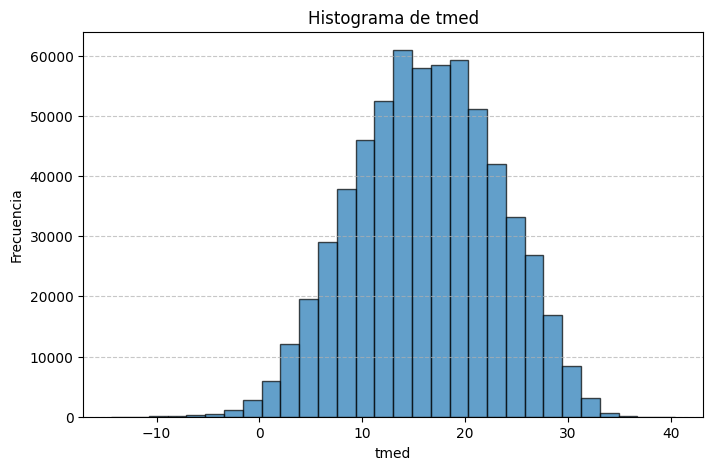

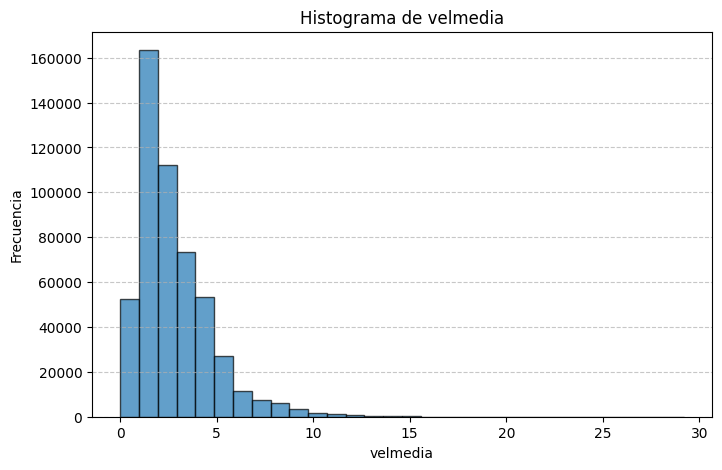

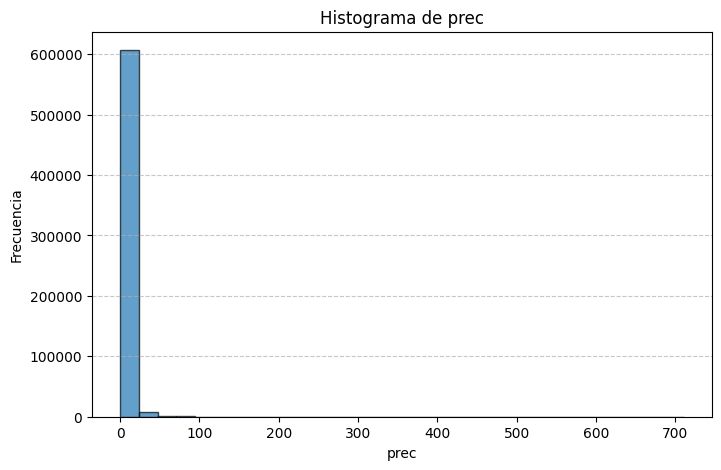

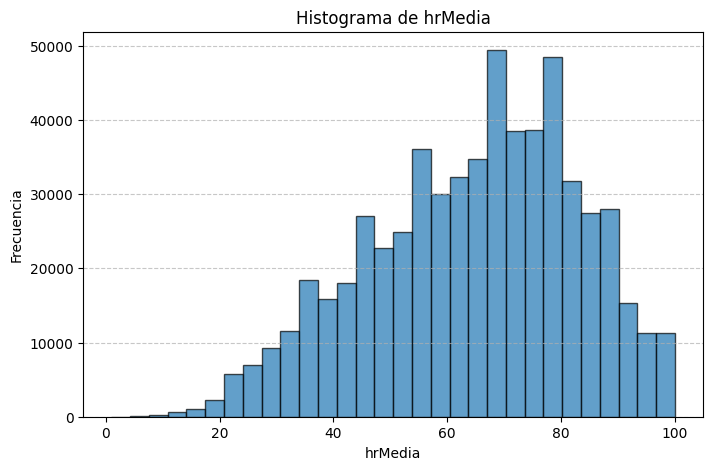

In [13]:
variables = ["tmed", "velmedia", "prec", "hrMedia"]

for var in variables:
    df[var] = df[var].astype(str).str.replace(",", ".")
    df[var] = pd.to_numeric(df[var], errors="coerce")


for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(df[var].dropna(), bins=30, edgecolor="black", alpha=0.7)
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de {var}")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


## En streamlit solo habrá un histograma y un filtro con la vble a graficar


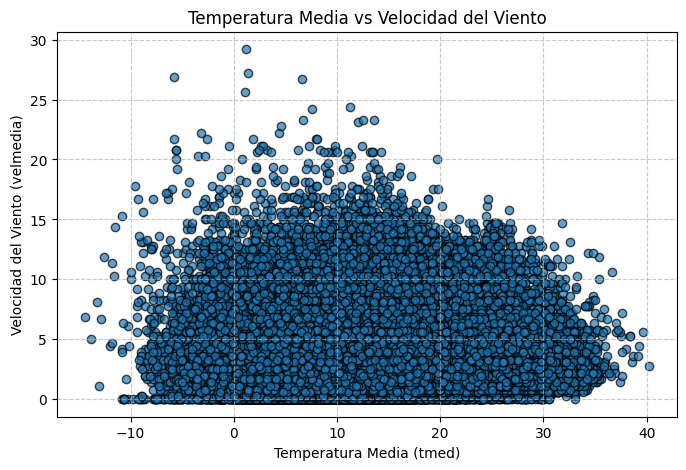

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(df["tmed"], df["velmedia"], alpha=0.7, edgecolors="black")
plt.xlabel("Temperatura Media (tmed)")
plt.ylabel("Velocidad del Viento (velmedia)")
plt.title("Temperatura Media vs Velocidad del Viento")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

## En streamlit solo habrá un scatterplot y un filtro con la vble a graficar

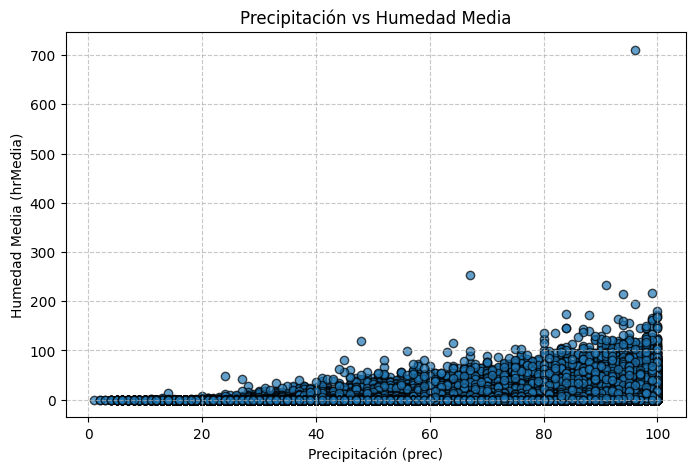

In [15]:
variables = ["tmed", "velmedia", "prec", "hrMedia"]


for var in variables:
    df[var] = df[var].astype(str).str.replace(",", ".")
    df[var] = pd.to_numeric(df[var], errors="coerce")


df_filtered = df.dropna(subset=["prec", "hrMedia"])

plt.figure(figsize=(8, 5))
plt.scatter(df_filtered["hrMedia"], df_filtered["prec"],  alpha=0.7, edgecolors="black")
plt.xlabel("Precipitación (prec)")
plt.ylabel("Humedad Media (hrMedia)")
plt.title("Precipitación vs Humedad Media")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()
